<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">FINAL LAB PROJECT</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">Course: Programming for Data Science</div>

![image.png](https://cdn.prod.website-files.com/63ccf2f0ea97be12ead278ed/644a18b637053fa3709c5ba2_what-is-data-science-p-1080.jpg)

<div class="list-group" id="list-tab" role="tablist">
<h3 style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>TABLE OF CONTENTS📝</b></h3>

* [1. Data Collection](#1)
     - [1.1 Overview](#1.1)
     - [1.2 License](#1.2)
     - [1.3 Data Collection Methods](#1.3)

* [2. Data Exploration](#2)
     - [2.1 Data Loading](#2.1)
     - [2.2 Data Overview ](#2.2)
     - [2.3 Data Distributions ](#2.3)


* [3. Question Formulation anf Data Analysis](#3)
     - [3.1 Question 1](#3.1)
     - [3.2 Question 2](#3.2)
     - [3.3 Question 3](#3.2)
  
* [4. Reflection](#4)

<a id='1'></a>
<div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">
    1. Data Collection
</div>

## ***1.1 Overview*** <a id='1.1'></a>

**Dataset Source:**
[Remote Work & Mental Health Dataset on Kaggle](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health?fbclid=IwY2xjawFrSKZleHRuA2FlbQIxMAABHeONLRrPuU1AbC_pHea8QyWNYYMqW-t0Tw_xZtxvDGbldU1ypWS0-AzKKg_aem_jAr-PidmQqlOTGowulNZBA)

🌿 This dataset examines the impact of remote work on employees' mental well-being. It focuses on how different work arrangements may influence stress levels, work-life balance, and mental health conditions. 

📈 Our analysis aims to:
 - Address key questions regarding the increasing prevalence of remote work and its effects across industries and regions, 
 - Offer actionable insights for researchers, HR professionals, and businesses to evaluate its impact on productivity and employee well-being.
 - Highlight the importance of prioritizing mental health in organizational policies and practices.

## ***1.2 License*** <a id='1.2'></a>
The Apache 2.0 License grants broad permissions for use, modification, and distribution of the dataset.

## ***1.3 Data Collection Methods*** <a id='1.3'></a>

### Sources

The dataset draws from a variety of sources to ensure a comprehensive understanding of the relationship between remote work and mental health. It incorporates responses from surveys distributed across social media platforms, professional networks, and online forums. These diverse channels helped capture a wide range of experiences and perspectives, enriching the dataset with valuable insights.

### Collection Methodology

Data collection involved designing a structured questionnaire that included both quantitative and qualitative questions. The survey was distributed digitally, allowing respondents to share their experiences regarding remote work's impact on their mental well-being. Responses were anonymized to maintain privacy, ensuring participants felt comfortable providing honest feedback. This methodology enables a thorough analysis of the mental health challenges and benefits associated with remote work environments.

<a id="2"></a>
<div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">2. Data Exploration</div>

## ***2.1 Data Loading*** <a id='2.1'></a>

### 👉 Import necessary libraries

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 👉 Read csv file into a Pandas Dataframe and print the first 5 rows of the Dataframe

In [188]:
path= './data/Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(path)
df.head()


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


## ***2.2 Data Overview*** <a id='2.2'></a>

### 👉 Check the number of rows and columns.

In [189]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 5000
Number of columns: 20


### 👉  Check the number of duplicated rows


In [190]:
have_duplicate_rows = bool(df.duplicated().any())
print(have_duplicate_rows)

False


### 👉 Inspect the data types for each column

In [191]:
col_dtype = df.dtypes
print(col_dtype)

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object


## ***2.3 Data Distributions*** <a id='2.3'></a>

### 👉 Let's consider numerical columns

In [192]:
numeric_df = df.select_dtypes(include='number')
numeric_df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


### 👉 Let's consider categorical columns

Define a function that display distribution for categorical columns

In [193]:
def Display_object(name_col, name_plot):
    print("All value:", df[name_col].count())
    print("Empty value:", df[name_col].isna().sum())
    
    plt.figure(figsize=(4, 4))
    plt.pie(
        df[name_col].value_counts().values , 
        labels= df[name_col].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors,
        textprops={'fontsize': 10}
    )
    plt.title(name_plot, fontsize=12 , color = 'blue')
    plt.axis('equal')  
    plt.show()

#### **Employee_ID**  :  

In [194]:
Employee_ID = set(df['Employee_ID'].to_list())
print('Number of employees:',len(Employee_ID))

Number of employees: 5000


#### **Gender**: 
- Prefer not to say
- Male
- Non - binary
- Female

Distinct value: {'Female', 'Prefer not to say', 'Non-binary', 'Male'}
All value: 5000
Empty value: 0


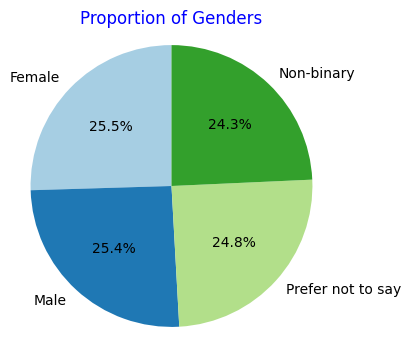

In [195]:
Gender = set(df['Gender'].to_list())
print('Distinct value:',Gender)
Display_object('Gender', 'Proportion of Genders')

#### **Job_role**: 
- HR
- Data Scientist
- Sales
- Designer
- Project Manager 
- Software Engineer
- Marketing

Distinct value: {'Software Engineer', 'Data Scientist', 'Project Manager', 'Designer', 'Marketing', 'HR', 'Sales'}
All value: 5000
Empty value: 0


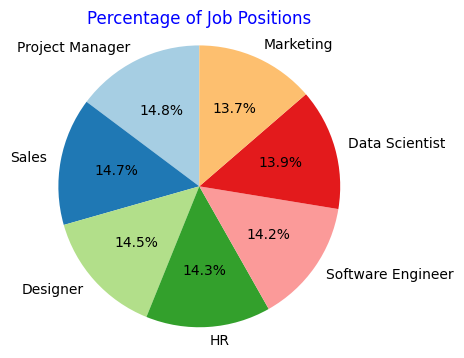

In [196]:
Job_Role = set(df['Job_Role'].to_list())
print('Distinct value:',Job_Role )
Display_object('Job_Role', 'Percentage of Job Positions')

#### **Industry**:
- Education
- Manufacturing
- IT
- Retail
- Finance
- Healthcare
- Consulting

Distinct value: {'Education', 'Finance', 'Retail', 'IT', 'Consulting', 'Manufacturing', 'Healthcare'}
All value: 5000
Empty value: 0


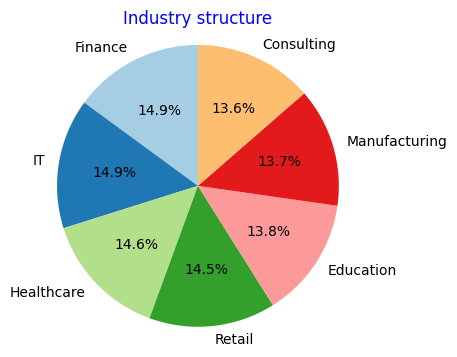

In [197]:
Industry = set(df['Industry'].to_list())
print('Distinct value:',Industry)
Display_object('Industry','Industry structure')

#### **Work_Location**: 
- Remote
- Onsite
- Hybrid

Distinct value: {'Onsite', 'Hybrid', 'Remote'}
All value: 5000
Empty value: 0


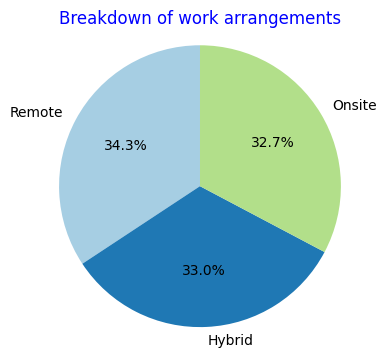

In [198]:
Work_Location = set(df['Work_Location'].to_list())
print('Distinct value:',Work_Location)
Display_object('Work_Location','Breakdown of work arrangements')

#### **Stress_Level**: 
- Low
- Medium
- High

Distinct value: {'High', 'Low', 'Medium'}
All value: 5000
Empty value: 0


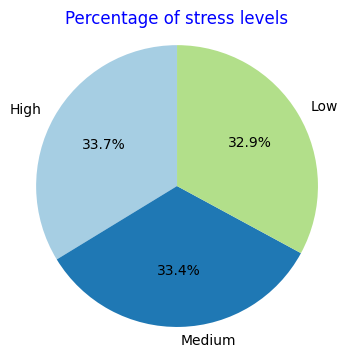

In [199]:
Stress_Level = set(df['Stress_Level'].to_list())
print('Distinct value:',Stress_Level)
Display_object('Stress_Level','Percentage of stress levels')

#### **Mental_Health_Condition**: 
- None
- Burnout 
- Anxiety 
- Depression 

Distinct value: {'Anxiety', 'Burnout', 'Depression', 'None'}
All value: 5000
Empty value: 0


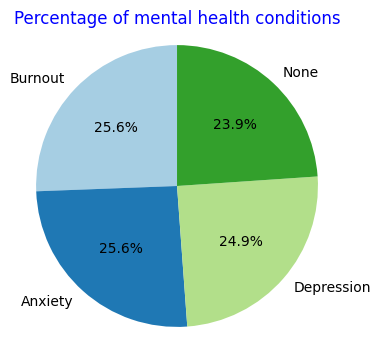

In [200]:
Mental_Health_Condition = set(df['Mental_Health_Condition'].to_list())
print('Distinct value:',Mental_Health_Condition)
Display_object('Mental_Health_Condition','Percentage of mental health conditions')

#### **Access_to_Mental_Health_Resources**: 
- No
- Yes

Distinct value: {'No', 'Yes'}
All value: 5000
Empty value: 0


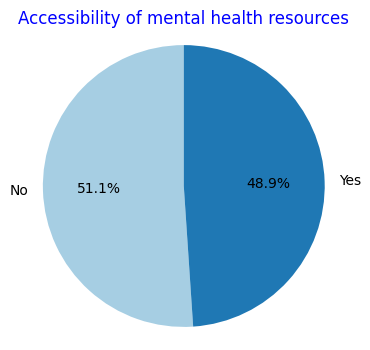

In [201]:
Access_to_Mental_Health_Resources = set(df['Access_to_Mental_Health_Resources'].to_list())
print('Distinct value:',Access_to_Mental_Health_Resources)
Display_object('Access_to_Mental_Health_Resources','Accessibility of mental health resources')

#### **Productivity_Change**:
- Increase
- Decrease
- No Change

All distinct value: {'No Change', 'Decrease', 'Increase'}
All value: 5000
Empty value: 0


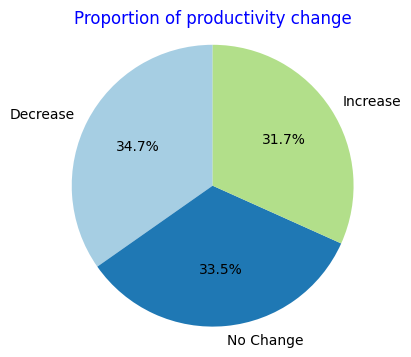

In [202]:
Productivity_Change = set(df['Productivity_Change'].to_list())
print('All distinct value:',Productivity_Change)
Display_object('Productivity_Change','Proportion of productivity change')

#### **Satisfaction_with_Remote_Work**:
- Satisfied 
- Neutral 
- Unsatisfied

All distinct value: {'Satisfied', 'Unsatisfied', 'Neutral'}
All value: 5000
Empty value: 0


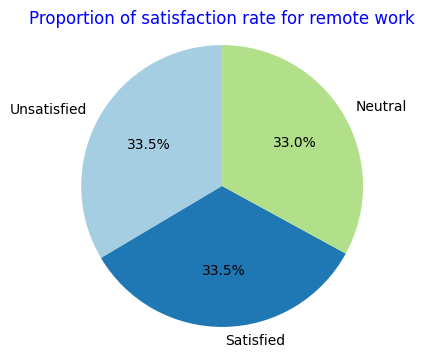

In [203]:
Satisfaction_with_Remote_Work = set(df['Satisfaction_with_Remote_Work'].to_list())
print('All distinct value:',Satisfaction_with_Remote_Work)
Display_object('Satisfaction_with_Remote_Work','Proportion of satisfaction rate for remote work')

#### **Physical_Activity**: 
- None
- Weekly 
- Daily 

Distinct value: {'Daily', 'None', 'Weekly'}
All value: 5000
Empty value: 0


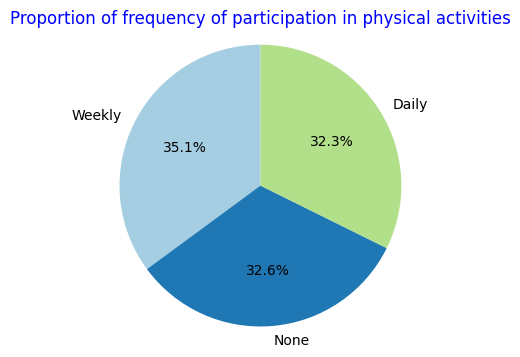

In [204]:
Physical_Activity = set(df['Physical_Activity'].to_list())
print('Distinct value:',Physical_Activity)
Display_object('Physical_Activity','Proportion of frequency of participation in physical activities')

#### **Sleep_Quality**: 
- Poor 
- Average
- Good 

Distinct value: {'Good', 'Average', 'Poor'}
All value: 5000
Empty value: 0


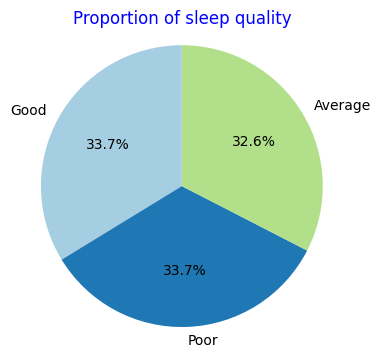

In [205]:
Sleep_Quality = set(df['Sleep_Quality'].to_list())
print('Distinct value:',Sleep_Quality)
Display_object('Sleep_Quality','Proportion of sleep quality')

#### **Region**: 
- North America 
- Oceania 
- Asia 
- Europe 
- South America 
- Africa 

Distinct value: {'Europe', 'South America', 'Africa', 'North America', 'Oceania', 'Asia'}
All value: 5000
Empty value: 0


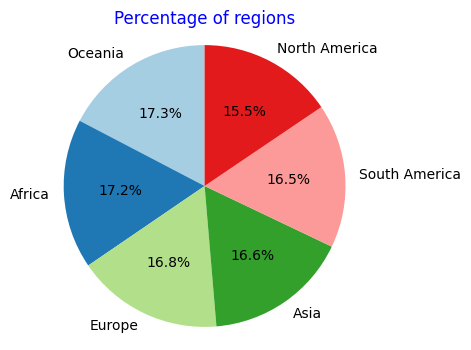

In [206]:
Region = set(df['Region'].to_list())
print('Distinct value:',Region)
Display_object('Region','Percentage of regions')

**💡Observation:**

For each column, data distribution is quite even 
* In numerical columns, the mean and the median value are not too different
* In categorical columns, the percentage of classes are similar

<a id="3"></a> 
<div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">3. Question Formulation and Analysis</div>

### ***3.1 Question 1*** <a id='3.1'></a>


#### <span style='color:#2B9C15 '>💬 Question </span>

Which industry reported the highest levels of remote work satisfaction among remote employees?

#### <span style='color:#2B9C15 '>🔎 What are the benefits of finding the answer? </span>

Finding the industry with the highest remote work satisfaction can reveal successful strategies and policies. These insights can serve as a model for other industries to enhance their remote work environments and improve employee happiness.

#### <span style='color:#2B9C15 '>📉 Data analysis ideas </span>

- Retrieve a subset of the data containing only remote workers and named `remote_workers`
- *Satisfied workers* are who reported that they were `satisfied` with remote work
- For each industry, the satisfaction percentage is evaluated using the formula

$$
    \text{satisfaction percentage} = \dfrac{\text{number of satisfied workers}}{\text{total number of workers}}.100 \ \ (\%)
$$

$\rightarrow$ Use the `groupby` function with appropriate aggregations in `pandas`

In [207]:
# Retrieve the subsets
remote_workers = df.loc[df.Work_Location == 'Remote', :] 
satisfaction = remote_workers.loc[:, ['Industry', 'Satisfaction_with_Remote_Work']]
satisfied_remote_workers = satisfaction[satisfaction['Satisfaction_with_Remote_Work'] == 'Satisfied']

In [208]:
# Calculate the percentage
ans = satisfied_remote_workers.groupby('Industry').count() / satisfaction.groupby('Industry').count()  * 100

# Sort values and normalize structure
ans = ans.sort_values(by=ans.columns[0], ascending=True)[ans.columns[0]]
ans

Industry
Healthcare       26.190476
IT               28.451883
Finance          29.182879
Retail           29.795918
Manufacturing    31.007752
Education        32.773109
Consulting       35.111111
Name: Satisfaction_with_Remote_Work, dtype: float64

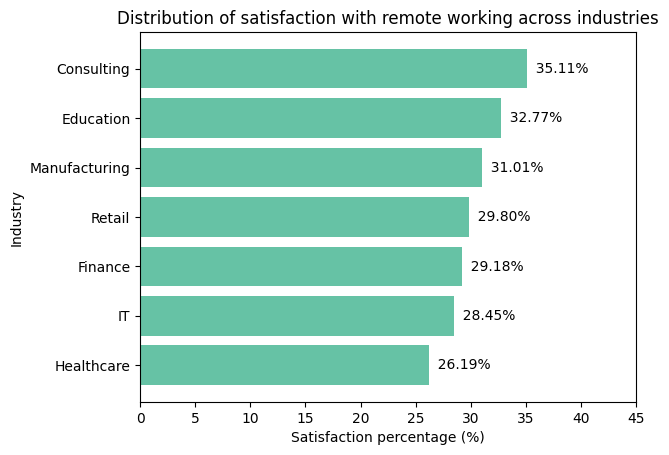

In [209]:
# visulize the result

disp_plot = plt.barh(ans.index, ans.values)
plt.bar_label(disp_plot, fmt= lambda x: f'  {x:.2f}%')
plt.title('Distribution of satisfaction with remote working across industries')
plt.xlabel('Satisfaction percentage (%)')
plt.ylabel('Industry')
plt.xlim((0, 45))
plt.show()

#### <span style='color:#2B9C15 '>💡 Observation </span>

<div style="border-radius:10px;border:#2B9C15  solid;padding: 15px;background-color:#F5F9D0;font-size:110%;text-align:left">

* We can see that the **Consulting** industry has the highest satisfaction with remote working. One reason for this could be that consulting jobs mainly involve tasks like reports, strategy planning, and client calls, which are easier to do remotely

* Industry has the lowest satisfaction percentage is **Healthcare**. It might be because of its liability. Healthcare jobs usually require meticulous and physically drained care-taking tasks. Therefore, remote working is not suitable for the nature of this profession


❓The reason behind low remote working satisfaction in the **IT** industry may be due to factors that have not been covered in this dataset, for example:
* Unfulfilling salary
* Working overtime (OT)

### ***3.2 Question 2*** <a id='3.2'></a>

#### <span style='color:#2B9C15 '>💬 Question </span>

How do working hours correlate with social isolation ratings across different industry?

#### <span style='color:#2B9C15 '>🔎 What are the benefits of finding the answer? </span>
This analysis provides industry-specific insights and examines whether the trends are consistent across sectors. Understanding the correlation between working hours and social isolation helps policy-makers and organizations identify patterns and implement targeted strategies to mitigate isolation effectively.

#### <span style='color:#2B9C15 '>📉 Data analysis ideas </span>
- Use box plot to visualize the distribution of working hours across industries and observe how social isolation ratings vary across different industries.  
- Use heatmap to show the average social isolation rating for each industry at varying working hour levels. This can highlight correlations or trends between working hours and isolation ratings.  
- Use depict the distribution of social isolation ratings within industries, segmented by working hour bins

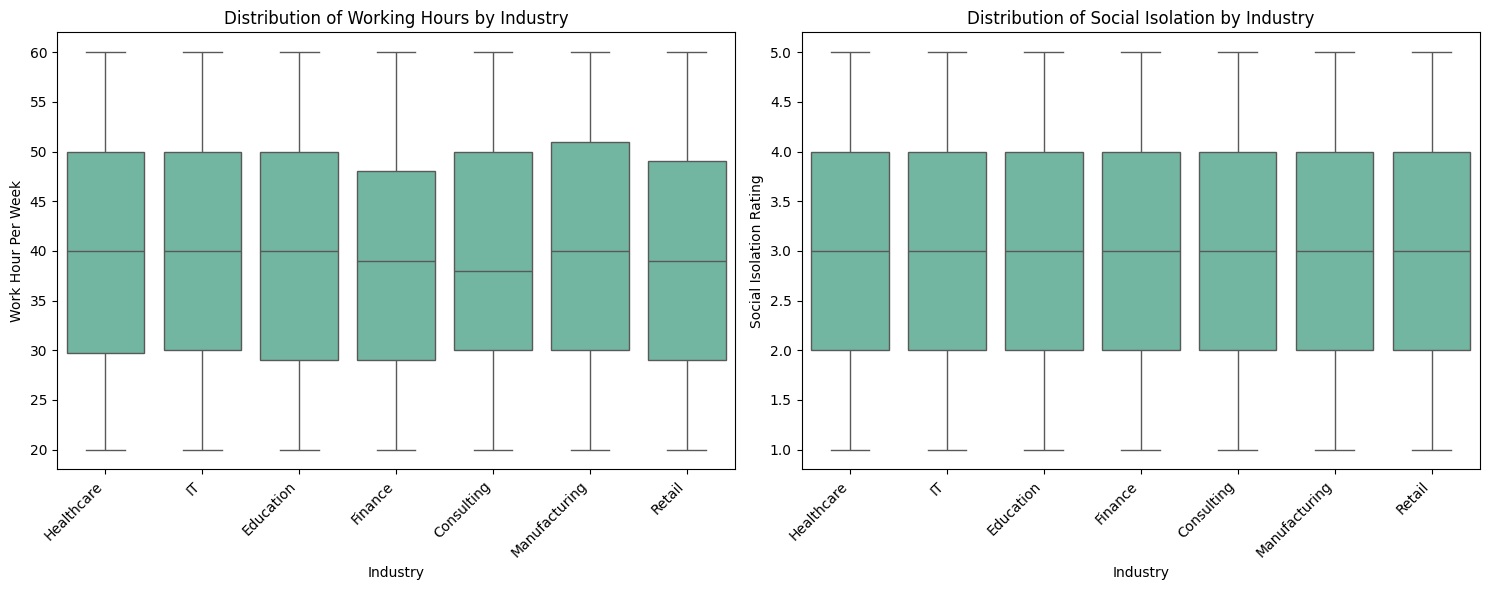

In [210]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df, x='Industry', y='Hours_Worked_Per_Week', ax=ax1)
ax1.set_title('Distribution of Working Hours by Industry')
ax1.set_xticks(range(len(df['Industry'].unique())))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel('Work Hour Per Week')

sns.boxplot(data=df, x='Industry', y='Social_Isolation_Rating', ax=ax2)
ax2.set_title('Distribution of Social Isolation by Industry')
ax2.set_xticks(range(len(df['Industry'].unique())))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel('Social Isolation Rating')

plt.tight_layout()
plt.show()


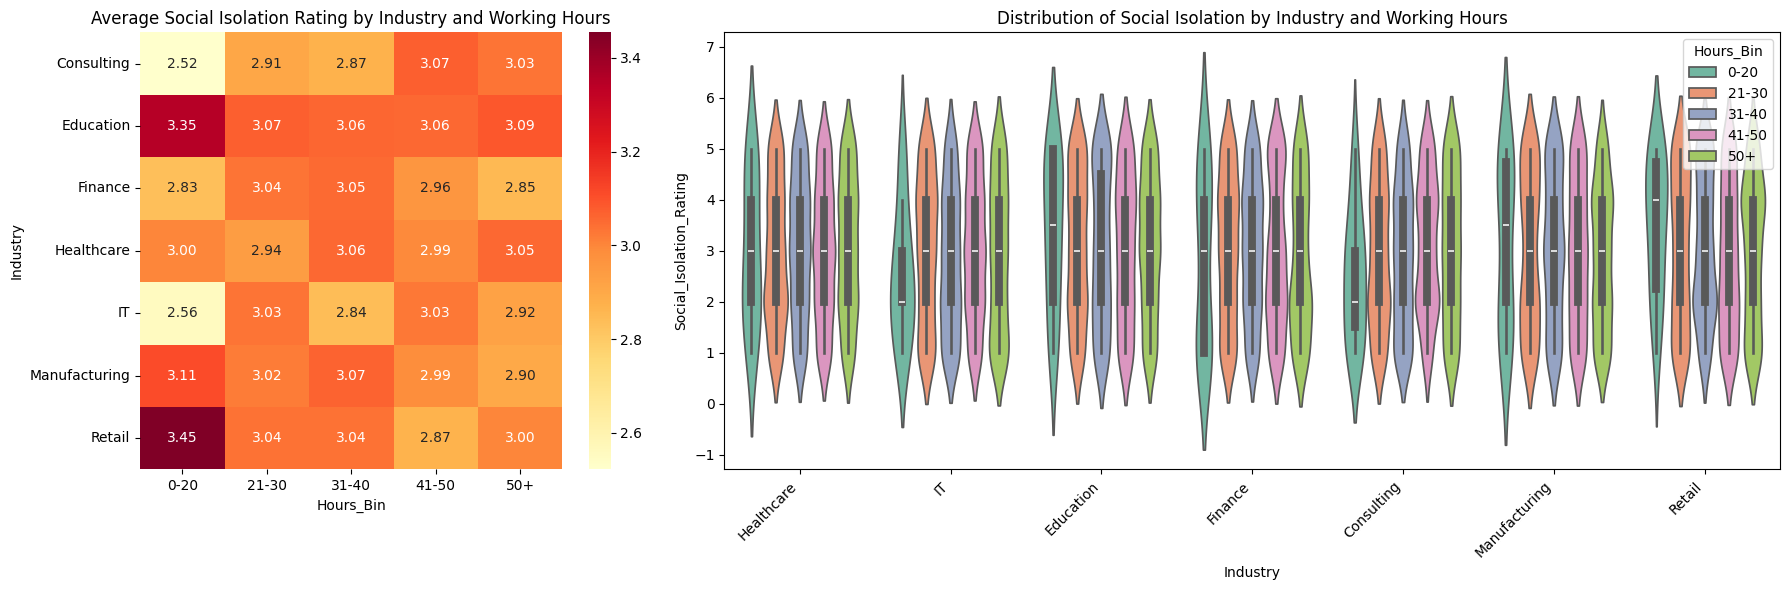

In [ ]:
df['Hours_Bin'] = pd.cut(df['Hours_Worked_Per_Week'], 
                        bins=[0, 20, 30, 40, 50, 100],
                        labels=['0-20', '21-30', '31-40', '41-50', '50+'])


pivot_data = df.pivot_table(values='Social_Isolation_Rating',
                            index='Industry',
                            columns='Hours_Bin',
                            aggfunc='mean')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})


#heatmap
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax1)
ax1.set_title('Average Social Isolation Rating by Industry and Working Hours')

#violin
sns.violinplot(data=df, x='Industry', y='Social_Isolation_Rating', hue='Hours_Bin', ax=ax2)
ax2.set_title('Distribution of Social Isolation by Industry and Working Hours')
ax2.set_xticks(range(len(df['Industry'].unique())))

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,ha='right')

plt.tight_layout()
plt.show()


#### <span style='color:#2B9C15 '>💡 Observation </span>

<div style="border-radius:10px;border:#2B9C15  solid;padding: 15px;background-color:#F5F9D0;font-size:110%;text-align:left">

- Longer working hours do not consistently correlate with higher social isolation ratings, as the heatmap shows relatively uniform color intensity across columns.
- The box plots shows insignificant variation in distributions, indicating a stable trend across industries for both working hours and social isolation ratings.
- The violin plots are mostly right-skewed, suggesting that most employees experience similar social isolation ratings, with no outlier.


###  ***3.3 Question 3*** <a id='3.3'></a>

#### <span style='color:#2B9C15 '>💬 Question </span>
Are there any significant differences in stress levels and sleep quality among employees in various industries?

#### <span style='color:#2B9C15 '>🔎 What are the benefits of finding the answer? </span>

Understanding the variations in stress levels and sleep quality across different industries provides in-depth information about which sectors may require targeted interventions to improve employee health and productivity

#### <span style='color:#2B9C15 '>📉 Data analysis ideas </span>

- We are going to analyze three columns: **'Industry', 'Stress_Level', 'Sleep_Quality'**
- Plot bar charts to visually compare the average **Stress_Level** and **Sleep_Quality** .
- Create heatmap to visualize the relationship between **Stress_Level** and  **Sleep_Quality**

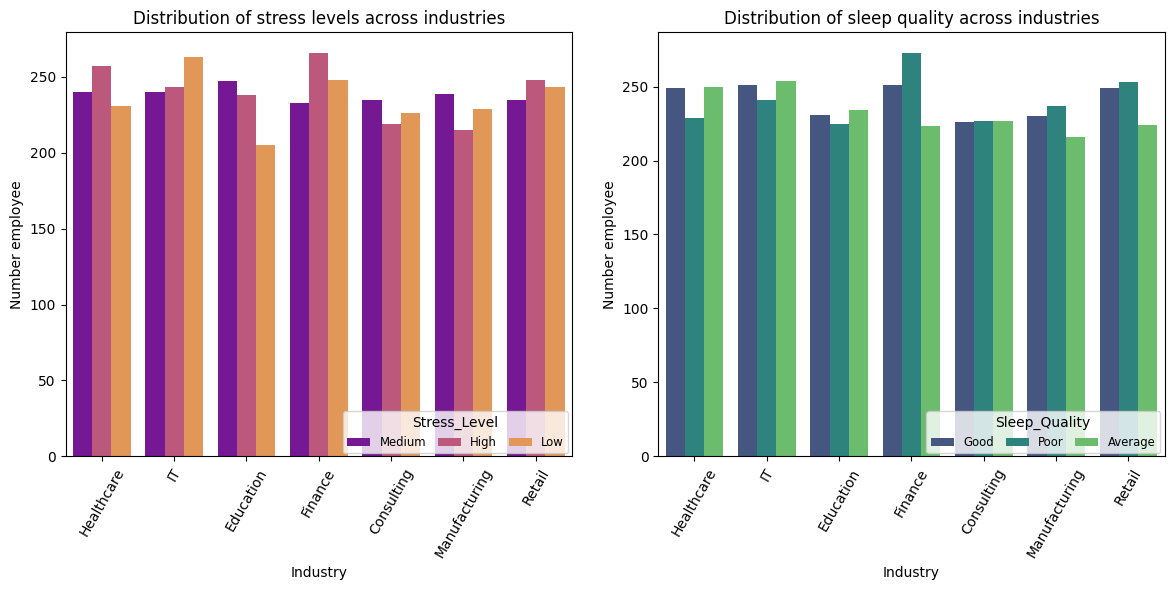

In [212]:
# code here
sns.set_palette('Set2')

# Tạo các ô con cho hai biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=False) #True -> using 1 X(number employee)

# Biểu đồ 1: Tỷ lệ mức căng thẳng theo ngành
plot1 = sns.countplot(data=df, x='Industry', hue='Stress_Level', palette='plasma', ax=axes[0])  
axes[0].set_title('Distribution of stress levels across industries')
axes[0].set_ylabel('Number employee')
axes[0].set_xlabel('Industry')
axes[0].tick_params(axis='x', rotation=60)
axes[0].legend(title='Stress_Level', loc='upper center', bbox_to_anchor=(0.77, 0.12), ncol=3, fontsize='small', columnspacing=1, markerscale=0.8)


# Biểu đồ 2: Tỷ lệ chất lượng giấc ngủ theo ngành
plot2 = sns.countplot(data=df, x='Industry', hue='Sleep_Quality', palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of sleep quality across industries')
axes[1].set_ylabel('Number employee')
axes[1].set_xlabel('Industry')
axes[1].tick_params(axis='x', rotation=60)
axes[1].legend(title='Sleep_Quality', loc='upper center', bbox_to_anchor=(0.76,0.12), ncol=3, fontsize='small', columnspacing=1, markerscale=0.8)  

plt.tight_layout()
plt.show()

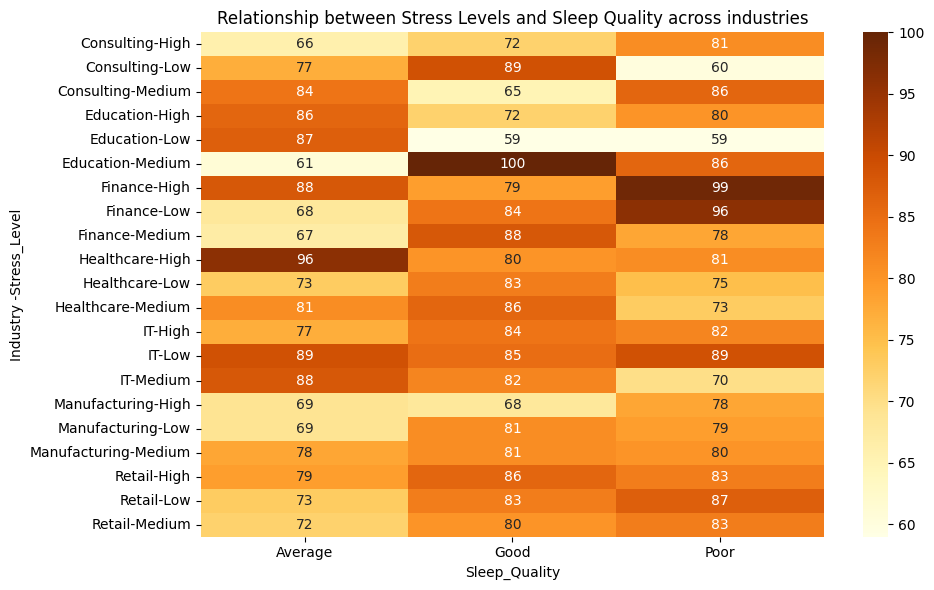

Correlation matrix:
                 Stress_Level_1  Sleep_Quality_1
Stress_Level_1         1.000000        -0.018505
Sleep_Quality_1       -0.018505         1.000000


In [213]:

# 1. Heatmap thể hiện mối quan hệ giữa mức độ căng thẳng và chất lượng giấc ngủ theo ngành
heatmap_data = df.groupby(['Industry', 'Stress_Level', 'Sleep_Quality']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrBr')
# plt.title('Mối quan hệ giữa mức độ căng thẳng và chất lượng giấc ngủ theo ngành')
plt.title('Relationship between Stress Levels and Sleep Quality across industries')
plt.ylabel('Industry -Stress_Level')
plt.xlabel('Sleep_Quality')
plt.tight_layout()
plt.show()

# 2. Tính toán ma trận tương quan giữa Stress_Level và Sleep_Quality
df['Stress_Level_1'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Sleep_Quality_1'] = df['Sleep_Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

correlation_matrix = df[['Stress_Level_1', 'Sleep_Quality_1']].corr()
print("Correlation matrix:")
print(correlation_matrix)



#### <span style='color:#2B9C15 '>💡 Observation </span>

<div style="border-radius:10px;border:#2B9C15  solid;padding: 15px;background-color:#F5F9D0;font-size:110%;text-align:left">

- High-stress industries such as Finance and Healthcare are prone to have poorer sleep quality, likely due to heavy and stressful workloads.
- In contrast, fields like IT and Retail often report better sleep
  
$\rightarrow$ **This suggests that reducing stress might improve sleep quality, however, factors beyond work stress should also be considered to fully understand this connection.**


<a id="4"></a>
<div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">4. Reflection</div>

💭 **Chau's reflection**

During the lab, I found one of the main challenges was interpreting the relationship between variables to pose meaningful question. Additionally, choosing the appropriate visualization techniques to effectively convey the insights also required significant effort

**What I have learned?**
- The lab project deepen understanding on data analysis. For example, I learned how to visualize data with more complex relationships using heatmap and violin plot. 
- I also gained hand-ons experience in identifying meaningful patterns in the dataset to draw actionable insights

💭 **Tam's reflection**

During the lab, I faced some challenges in formulating meaningful questions from the data I had collected, in order to meet the project requirements. The main reason was that the data was too evenly distributed, and some columns didn’t provide clear analytical value. Additionally, I spent quite a bit of time getting familiar with and mastering Git. However, through this process, I learned how to create various visualizations and use Markdown for formatting and commenting on the results in a more visual way.


💭 **Kiet's reflection**

The same as my teammates, asking actionable questions is such a challenge to me (within this dataset). We cannot find any correlation among features.
This is the first time I have suffered this feelings!

Initially, my team was very hestitate about "version control with jupyter notebook'. It's the second challenge. Git check the version of each cell seperately making resolving conflicts more difficult. 

However, praticing this lab strengthen me a lot, about teamworking, making actionable questions, tasks distributing and git skils as well!


⏰ **IF WE HAD MORE TIME .....**

We would
- Perform more advanced exploratory data analysis and statistical tests to confirm observed trends. 
- Develop predictive model to forecast mental health outcome based on working conditions

<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">THE END</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">Thank you</div>